In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
SEED = 3
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# -------------------------------
# Parameters
# -------------------------------
IMG_SIZE = 48
NUM_CLASSES = 8
EPOCHS = 100
BATCH_SIZE = 128
DROPOUT_RATE = 0.3
LEARNING_RATE = 0.01
DATA_DIR = '/content/drive/My Drive/ec523 project/data/affectnet'
#DATA_DIR = 'preprocessed_data'  # Folder containing X_train.npy, y_train.npy, X_val.npy, y_val.npy, X_test.npy, y_test.npy

# -------------------------------
# Load Preprocessed Data (Training, Validation & Test Sets)
# -------------------------------
def load_data(data_dir):
    #X_test = np.load(os.path.join(data_dir, 'X_test.npy'))
    X_train = np.load(os.path.join(data_dir, 'X_train.npy'))
    y_train = np.load(os.path.join(data_dir, 'y_train.npy'))
    X_val = np.load(os.path.join(data_dir, 'X_val.npy'))
    y_val = np.load(os.path.join(data_dir, 'y_val.npy'))
    X_test = np.load(os.path.join(data_dir, 'X_test.npy'))
    y_test = np.load(os.path.join(data_dir, 'y_test.npy'))
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = load_data(DATA_DIR)
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (201347, 48, 48, 1) (201347, 8)
Validation set: (43155, 48, 48, 1) (43155, 8)
Test set: (43148, 48, 48, 1) (43148, 8)


In [ ]:
# -------------------------------
# Build Model (Same Architecture as FER2013 Baseline)
# -------------------------------
model = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same', name="conv1"),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(32, (3, 3), activation='relu', padding='same', name="conv2"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), name="maxpool2"),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu', padding='same', name="conv3"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), name="maxpool3"),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu', padding='same', name="conv4"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), name="maxpool4"),
    Dropout(0.2),
    Flatten(),
    Dense(1024, activation='relu', name='fc1'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(NUM_CLASSES, activation='softmax', name='fcsoftmax')
])

sgd = SGD(learning_rate=LEARNING_RATE, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# -------------------------------
# Set Up Callbacks
# -------------------------------
checkpoint = ModelCheckpoint("CNN_AffectNet_final_implement_model.h5", monitor='loss', verbose=1, save_best_only=True, mode='min')
#checkpoint = ModelCheckpoint("AffectNet_CNN_best.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
rlrop = ReduceLROnPlateau(monitor='loss', mode='min', factor=0.5, patience=10, min_lr=0.00001, verbose=1)
callbacks_list = [checkpoint, rlrop]

In [ ]:
history = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks_list,
    shuffle=True,
    validation_data=(X_val, y_val)
)

Epoch 1/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5431 - loss: 1.3697
Epoch 1: loss improved from inf to 1.17874, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.5431 - loss: 1.3696 - val_accuracy: 0.6614 - val_loss: 0.9951 - learning_rate: 0.0100
Epoch 2/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6477 - loss: 1.0185
Epoch 2: loss improved from 1.17874 to 0.99431, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 76s 44ms/step - accuracy: 0.6477 - loss: 1.0185 - val_accuracy: 0.6889 - val_loss: 0.9072 - learning_rate: 0.0100
Epoch 3/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6682 - loss: 0.9533
Epoch 3: loss improved from 0.99431 to 0.93680, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.6682 - loss: 0.9533 - val_accuracy: 0.7012 - val_loss: 0.8595 - learning_rate: 0.0100
Epoch 4/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6827 - loss: 0.9109
Epoch 4: loss improved from 0.93680 to 0.89995, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.6827 - loss: 0.9109 - val_accuracy: 0.7084 - val_loss: 0.8277 - learning_rate: 0.0100
Epoch 5/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6930 - loss: 0.8789
Epoch 5: loss improved from 0.89995 to 0.87047, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.6930 - loss: 0.8789 - val_accuracy: 0.7146 - val_loss: 0.8153 - learning_rate: 0.0100
Epoch 6/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6998 - loss: 0.8568
Epoch 6: loss improved from 0.87047 to 0.85044, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6998 - loss: 0.8567 - val_accuracy: 0.7185 - val_loss: 0.8021 - learning_rate: 0.0100
Epoch 7/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7059 - loss: 0.8381
Epoch 7: loss improved from 0.85044 to 0.83354, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7059 - loss: 0.8381 - val_accuracy: 0.7203 - val_loss: 0.7973 - learning_rate: 0.0100
Epoch 8/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7112 - loss: 0.8222
Epoch 8: loss improved from 0.83354 to 0.81660, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7112 - loss: 0.8222 - val_accuracy: 0.7217 - val_loss: 0.7911 - learning_rate: 0.0100
Epoch 9/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7155 - loss: 0.8098
Epoch 9: loss improved from 0.81660 to 0.80243, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7155 - loss: 0.8098 - val_accuracy: 0.7252 - val_loss: 0.7873 - learning_rate: 0.0100
Epoch 10/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7193 - loss: 0.7948
Epoch 10: loss improved from 0.80243 to 0.79070, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7193 - loss: 0.7948 - val_accuracy: 0.7280 - val_loss: 0.7867 - learning_rate: 0.0100
Epoch 11/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7245 - loss: 0.7803
Epoch 11: loss improved from 0.79070 to 0.77594, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7245 - loss: 0.7803 - val_accuracy: 0.7312 - val_loss: 0.7701 - learning_rate: 0.0100
Epoch 12/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7271 - loss: 0.7707
Epoch 12: loss improved from 0.77594 to 0.76633, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7271 - loss: 0.7707 - val_accuracy: 0.7303 - val_loss: 0.7704 - learning_rate: 0.0100
Epoch 13/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7318 - loss: 0.7615
Epoch 13: loss improved from 0.76633 to 0.75597, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7318 - loss: 0.7615 - val_accuracy: 0.7303 - val_loss: 0.7768 - learning_rate: 0.0100
Epoch 14/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7328 - loss: 0.7531
Epoch 14: loss improved from 0.75597 to 0.74654, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7328 - loss: 0.7531 - val_accuracy: 0.7315 - val_loss: 0.7682 - learning_rate: 0.0100
Epoch 15/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7361 - loss: 0.7402
Epoch 15: loss improved from 0.74654 to 0.73598, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7361 - loss: 0.7402 - val_accuracy: 0.7329 - val_loss: 0.7710 - learning_rate: 0.0100
Epoch 16/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7406 - loss: 0.7322
Epoch 16: loss improved from 0.73598 to 0.72676, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7406 - loss: 0.7322 - val_accuracy: 0.7319 - val_loss: 0.7715 - learning_rate: 0.0100
Epoch 17/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7417 - loss: 0.7222
Epoch 17: loss improved from 0.72676 to 0.71693, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7417 - loss: 0.7221 - val_accuracy: 0.7338 - val_loss: 0.7705 - learning_rate: 0.0100
Epoch 18/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7449 - loss: 0.7138
Epoch 18: loss improved from 0.71693 to 0.70768, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7449 - loss: 0.7138 - val_accuracy: 0.7341 - val_loss: 0.7694 - learning_rate: 0.0100
Epoch 19/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7509 - loss: 0.7017
Epoch 19: loss improved from 0.70768 to 0.69838, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7509 - loss: 0.7017 - val_accuracy: 0.7352 - val_loss: 0.7681 - learning_rate: 0.0100
Epoch 20/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7508 - loss: 0.6933
Epoch 20: loss improved from 0.69838 to 0.68959, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7508 - loss: 0.6932 - val_accuracy: 0.7356 - val_loss: 0.7730 - learning_rate: 0.0100
Epoch 21/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7544 - loss: 0.6839
Epoch 21: loss improved from 0.68959 to 0.68106, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7544 - loss: 0.6839 - val_accuracy: 0.7376 - val_loss: 0.7710 - learning_rate: 0.0100
Epoch 22/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7590 - loss: 0.6728
Epoch 22: loss improved from 0.68106 to 0.66988, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7590 - loss: 0.6727 - val_accuracy: 0.7363 - val_loss: 0.7701 - learning_rate: 0.0100
Epoch 23/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7624 - loss: 0.6633
Epoch 23: loss improved from 0.66988 to 0.66106, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7624 - loss: 0.6633 - val_accuracy: 0.7356 - val_loss: 0.7745 - learning_rate: 0.0100
Epoch 24/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7654 - loss: 0.6529
Epoch 24: loss improved from 0.66106 to 0.65010, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7654 - loss: 0.6529 - val_accuracy: 0.7350 - val_loss: 0.7795 - learning_rate: 0.0100
Epoch 25/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7659 - loss: 0.6483
Epoch 25: loss improved from 0.65010 to 0.64594, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7659 - loss: 0.6483 - val_accuracy: 0.7361 - val_loss: 0.7802 - learning_rate: 0.0100
Epoch 26/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7691 - loss: 0.6401
Epoch 26: loss improved from 0.64594 to 0.63741, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7691 - loss: 0.6401 - val_accuracy: 0.7325 - val_loss: 0.7970 - learning_rate: 0.0100
Epoch 27/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7692 - loss: 0.6392
Epoch 27: loss improved from 0.63741 to 0.63051, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7692 - loss: 0.6392 - val_accuracy: 0.7367 - val_loss: 0.7875 - learning_rate: 0.0100
Epoch 28/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7726 - loss: 0.6253
Epoch 28: loss improved from 0.63051 to 0.61907, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7726 - loss: 0.6253 - val_accuracy: 0.7356 - val_loss: 0.7924 - learning_rate: 0.0100
Epoch 29/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7763 - loss: 0.6152
Epoch 29: loss improved from 0.61907 to 0.61140, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7763 - loss: 0.6152 - val_accuracy: 0.7380 - val_loss: 0.7959 - learning_rate: 0.0100
Epoch 30/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7789 - loss: 0.6081
Epoch 30: loss improved from 0.61140 to 0.60440, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.7789 - loss: 0.6081 - val_accuracy: 0.7311 - val_loss: 0.8322 - learning_rate: 0.0100
Epoch 31/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7795 - loss: 0.6101
Epoch 31: loss improved from 0.60440 to 0.60350, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7795 - loss: 0.6101 - val_accuracy: 0.7340 - val_loss: 0.7956 - learning_rate: 0.0100
Epoch 32/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7832 - loss: 0.5934
Epoch 32: loss improved from 0.60350 to 0.58831, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7832 - loss: 0.5934 - val_accuracy: 0.7367 - val_loss: 0.8070 - learning_rate: 0.0100
Epoch 33/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7867 - loss: 0.5856
Epoch 33: loss improved from 0.58831 to 0.58142, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7867 - loss: 0.5856 - val_accuracy: 0.7333 - val_loss: 0.8185 - learning_rate: 0.0100
Epoch 34/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7875 - loss: 0.5818
Epoch 34: loss improved from 0.58142 to 0.57586, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7875 - loss: 0.5818 - val_accuracy: 0.7357 - val_loss: 0.8223 - learning_rate: 0.0100
Epoch 35/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7912 - loss: 0.5702
Epoch 35: loss improved from 0.57586 to 0.56585, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7912 - loss: 0.5702 - val_accuracy: 0.7341 - val_loss: 0.8124 - learning_rate: 0.0100
Epoch 36/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7927 - loss: 0.5649
Epoch 36: loss improved from 0.56585 to 0.56319, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.7927 - loss: 0.5649 - val_accuracy: 0.7338 - val_loss: 0.8140 - learning_rate: 0.0100
Epoch 37/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7964 - loss: 0.5566
Epoch 37: loss improved from 0.56319 to 0.55409, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7964 - loss: 0.5566 - val_accuracy: 0.7350 - val_loss: 0.8206 - learning_rate: 0.0100
Epoch 38/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7982 - loss: 0.5506
Epoch 38: loss improved from 0.55409 to 0.54502, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7982 - loss: 0.5506 - val_accuracy: 0.7335 - val_loss: 0.8291 - learning_rate: 0.0100
Epoch 39/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8005 - loss: 0.5446
Epoch 39: loss improved from 0.54502 to 0.54045, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8005 - loss: 0.5446 - val_accuracy: 0.7354 - val_loss: 0.8203 - learning_rate: 0.0100
Epoch 40/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8028 - loss: 0.5395
Epoch 40: loss improved from 0.54045 to 0.53499, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8028 - loss: 0.5395 - val_accuracy: 0.7305 - val_loss: 0.8622 - learning_rate: 0.0100
Epoch 41/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8022 - loss: 0.5410
Epoch 41: loss improved from 0.53499 to 0.53115, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8022 - loss: 0.5410 - val_accuracy: 0.7319 - val_loss: 0.8640 - learning_rate: 0.0100
Epoch 42/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8018 - loss: 0.5440
Epoch 42: loss improved from 0.53115 to 0.53113, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8018 - loss: 0.5440 - val_accuracy: 0.7332 - val_loss: 0.8471 - learning_rate: 0.0100
Epoch 43/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8079 - loss: 0.5239
Epoch 43: loss improved from 0.53113 to 0.51916, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8079 - loss: 0.5239 - val_accuracy: 0.7323 - val_loss: 0.8508 - learning_rate: 0.0100
Epoch 44/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8093 - loss: 0.5197
Epoch 44: loss improved from 0.51916 to 0.51455, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8093 - loss: 0.5197 - val_accuracy: 0.7305 - val_loss: 0.8538 - learning_rate: 0.0100
Epoch 45/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8122 - loss: 0.5131
Epoch 45: loss improved from 0.51455 to 0.50805, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8122 - loss: 0.5131 - val_accuracy: 0.7308 - val_loss: 0.8565 - learning_rate: 0.0100
Epoch 46/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8135 - loss: 0.5081
Epoch 46: loss improved from 0.50805 to 0.50351, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.8135 - loss: 0.5081 - val_accuracy: 0.7224 - val_loss: 0.8714 - learning_rate: 0.0100
Epoch 47/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8097 - loss: 0.5183
Epoch 47: loss did not improve from 0.50351
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - accuracy: 0.8097 - loss: 0.5183 - val_accuracy: 0.7306 - val_loss: 0.8603 - learning_rate: 0.0100
Epoch 48/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8172 - loss: 0.4973
Epoch 48: loss improved from 0.50351 to 0.49267, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8172 - loss: 0.4973 - val_accuracy: 0.7316 - val_loss: 0.8628 - learning_rate: 0.0100
Epoch 49/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8177 - loss: 0.4973
Epoch 49: loss improved from 0.49267 to 0.48988, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8177 - loss: 0.4973 - val_accuracy: 0.7309 - val_loss: 0.8763 - learning_rate: 0.0100
Epoch 50/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8209 - loss: 0.4885
Epoch 50: loss improved from 0.48988 to 0.48225, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.8209 - loss: 0.4885 - val_accuracy: 0.7312 - val_loss: 0.8646 - learning_rate: 0.0100
Epoch 51/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8192 - loss: 0.4884
Epoch 51: loss improved from 0.48225 to 0.48215, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8192 - loss: 0.4884 - val_accuracy: 0.7302 - val_loss: 0.8648 - learning_rate: 0.0100
Epoch 52/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8243 - loss: 0.4785
Epoch 52: loss improved from 0.48215 to 0.47365, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8243 - loss: 0.4785 - val_accuracy: 0.7306 - val_loss: 0.8858 - learning_rate: 0.0100
Epoch 53/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8235 - loss: 0.4775
Epoch 53: loss improved from 0.47365 to 0.47190, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8235 - loss: 0.4775 - val_accuracy: 0.7308 - val_loss: 0.8801 - learning_rate: 0.0100
Epoch 54/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8271 - loss: 0.4699
Epoch 54: loss improved from 0.47190 to 0.46749, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8271 - loss: 0.4699 - val_accuracy: 0.7319 - val_loss: 0.8908 - learning_rate: 0.0100
Epoch 55/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8292 - loss: 0.4652
Epoch 55: loss improved from 0.46749 to 0.46186, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8292 - loss: 0.4652 - val_accuracy: 0.7308 - val_loss: 0.8890 - learning_rate: 0.0100
Epoch 56/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8300 - loss: 0.4620
Epoch 56: loss improved from 0.46186 to 0.45854, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8300 - loss: 0.4620 - val_accuracy: 0.7292 - val_loss: 0.8955 - learning_rate: 0.0100
Epoch 57/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8318 - loss: 0.4568
Epoch 57: loss improved from 0.45854 to 0.45298, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8318 - loss: 0.4568 - val_accuracy: 0.7314 - val_loss: 0.8774 - learning_rate: 0.0100
Epoch 58/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8330 - loss: 0.4538
Epoch 58: loss improved from 0.45298 to 0.44957, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8330 - loss: 0.4538 - val_accuracy: 0.7310 - val_loss: 0.8954 - learning_rate: 0.0100
Epoch 59/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8328 - loss: 0.4515
Epoch 59: loss improved from 0.44957 to 0.44931, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8328 - loss: 0.4515 - val_accuracy: 0.7301 - val_loss: 0.8969 - learning_rate: 0.0100
Epoch 60/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8363 - loss: 0.4416
Epoch 60: loss improved from 0.44931 to 0.43879, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 85s 46ms/step - accuracy: 0.8363 - loss: 0.4416 - val_accuracy: 0.7283 - val_loss: 0.8906 - learning_rate: 0.0100
Epoch 61/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8380 - loss: 0.4394
Epoch 61: loss improved from 0.43879 to 0.43774, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8380 - loss: 0.4394 - val_accuracy: 0.7311 - val_loss: 0.8903 - learning_rate: 0.0100
Epoch 62/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8372 - loss: 0.4420
Epoch 62: loss improved from 0.43774 to 0.43423, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8372 - loss: 0.4420 - val_accuracy: 0.7303 - val_loss: 0.9045 - learning_rate: 0.0100
Epoch 63/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8377 - loss: 0.4372
Epoch 63: loss improved from 0.43423 to 0.43247, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.8377 - loss: 0.4372 - val_accuracy: 0.7301 - val_loss: 0.9199 - learning_rate: 0.0100
Epoch 64/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8406 - loss: 0.4296
Epoch 64: loss improved from 0.43247 to 0.42734, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8406 - loss: 0.4296 - val_accuracy: 0.7283 - val_loss: 0.9243 - learning_rate: 0.0100
Epoch 65/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8416 - loss: 0.4274
Epoch 65: loss improved from 0.42734 to 0.42348, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8416 - loss: 0.4274 - val_accuracy: 0.7308 - val_loss: 0.9117 - learning_rate: 0.0100
Epoch 66/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8445 - loss: 0.4218
Epoch 66: loss improved from 0.42348 to 0.41805, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8445 - loss: 0.4218 - val_accuracy: 0.7302 - val_loss: 0.9276 - learning_rate: 0.0100
Epoch 67/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8440 - loss: 0.4185
Epoch 67: loss improved from 0.41805 to 0.41599, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8440 - loss: 0.4185 - val_accuracy: 0.7271 - val_loss: 0.9205 - learning_rate: 0.0100
Epoch 68/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8444 - loss: 0.4189
Epoch 68: loss improved from 0.41599 to 0.41299, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8444 - loss: 0.4189 - val_accuracy: 0.7275 - val_loss: 0.9276 - learning_rate: 0.0100
Epoch 69/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8463 - loss: 0.4153
Epoch 69: loss improved from 0.41299 to 0.41097, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8463 - loss: 0.4153 - val_accuracy: 0.7296 - val_loss: 0.9223 - learning_rate: 0.0100
Epoch 70/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8461 - loss: 0.4142
Epoch 70: loss improved from 0.41097 to 0.40781, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 84s 46ms/step - accuracy: 0.8461 - loss: 0.4142 - val_accuracy: 0.7282 - val_loss: 0.9177 - learning_rate: 0.0100
Epoch 71/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8491 - loss: 0.4070
Epoch 71: loss improved from 0.40781 to 0.40381, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - accuracy: 0.8491 - loss: 0.4070 - val_accuracy: 0.7302 - val_loss: 0.9606 - learning_rate: 0.0100
Epoch 72/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8499 - loss: 0.4095
Epoch 72: loss did not improve from 0.40381
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8499 - loss: 0.4095 - val_accuracy: 0.7292 - val_loss: 0.9326 - learning_rate: 0.0100
Epoch 73/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8486 - loss: 0.4075
Epoch 73: loss improved from 0.40381 to 0.39992, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8486 - loss: 0.4075 - val_accuracy: 0.7279 - val_loss: 0.9414 - learning_rate: 0.0100
Epoch 74/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8526 - loss: 0.3981
Epoch 74: loss improved from 0.39992 to 0.39700, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8526 - loss: 0.3981 - val_accuracy: 0.7282 - val_loss: 0.9324 - learning_rate: 0.0100
Epoch 75/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8519 - loss: 0.4014
Epoch 75: loss improved from 0.39700 to 0.39495, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8519 - loss: 0.4014 - val_accuracy: 0.7268 - val_loss: 0.9613 - learning_rate: 0.0100
Epoch 76/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8554 - loss: 0.3926
Epoch 76: loss improved from 0.39495 to 0.38906, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8554 - loss: 0.3926 - val_accuracy: 0.7279 - val_loss: 0.9674 - learning_rate: 0.0100
Epoch 77/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8547 - loss: 0.3907
Epoch 77: loss did not improve from 0.38906
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8547 - loss: 0.3907 - val_accuracy: 0.7275 - val_loss: 0.9536 - learning_rate: 0.0100
Epoch 78/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8559 - loss: 0.3908
Epoch 78: loss improved from 0.38906 to 0.38504, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.8559 - loss: 0.3908 - val_accuracy: 0.7262 - val_loss: 0.9481 - learning_rate: 0.0100
Epoch 79/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8559 - loss: 0.3874
Epoch 79: loss improved from 0.38504 to 0.38193, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8559 - loss: 0.3874 - val_accuracy: 0.7268 - val_loss: 0.9498 - learning_rate: 0.0100
Epoch 80/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8568 - loss: 0.3859
Epoch 80: loss improved from 0.38193 to 0.38192, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8569 - loss: 0.3859 - val_accuracy: 0.7275 - val_loss: 0.9532 - learning_rate: 0.0100
Epoch 81/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8597 - loss: 0.3825
Epoch 81: loss improved from 0.38192 to 0.38105, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8597 - loss: 0.3825 - val_accuracy: 0.7285 - val_loss: 0.9670 - learning_rate: 0.0100
Epoch 82/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8595 - loss: 0.3799
Epoch 82: loss improved from 0.38105 to 0.37419, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8595 - loss: 0.3799 - val_accuracy: 0.7287 - val_loss: 0.9816 - learning_rate: 0.0100
Epoch 83/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8618 - loss: 0.3753
Epoch 83: loss improved from 0.37419 to 0.37334, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.8618 - loss: 0.3753 - val_accuracy: 0.7271 - val_loss: 0.9574 - learning_rate: 0.0100
Epoch 84/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8614 - loss: 0.3734
Epoch 84: loss improved from 0.37334 to 0.37309, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8614 - loss: 0.3734 - val_accuracy: 0.7262 - val_loss: 0.9488 - learning_rate: 0.0100
Epoch 85/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8637 - loss: 0.3691
Epoch 85: loss improved from 0.37309 to 0.36895, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8637 - loss: 0.3691 - val_accuracy: 0.7274 - val_loss: 0.9897 - learning_rate: 0.0100
Epoch 86/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8627 - loss: 0.3715
Epoch 86: loss did not improve from 0.36895
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8627 - loss: 0.3715 - val_accuracy: 0.7260 - val_loss: 0.9709 - learning_rate: 0.0100
Epoch 87/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8642 - loss: 0.3662
Epoch 87: loss improved from 0.36895 to 0.36342, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.8642 - loss: 0.3661 - val_accuracy: 0.7259 - val_loss: 0.9805 - learning_rate: 0.0100
Epoch 88/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8641 - loss: 0.3695
Epoch 88: loss did not improve from 0.36342
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.8641 - loss: 0.3695 - val_accuracy: 0.7257 - val_loss: 0.9648 - learning_rate: 0.0100
Epoch 89/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8654 - loss: 0.3651
Epoch 89: loss improved from 0.36342 to 0.36247, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8655 - loss: 0.3651 - val_accuracy: 0.7268 - val_loss: 1.0041 - learning_rate: 0.0100
Epoch 90/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8655 - loss: 0.3645
Epoch 90: loss improved from 0.36247 to 0.36005, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8655 - loss: 0.3645 - val_accuracy: 0.7269 - val_loss: 0.9707 - learning_rate: 0.0100
Epoch 91/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8686 - loss: 0.3561
Epoch 91: loss improved from 0.36005 to 0.35350, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8686 - loss: 0.3561 - val_accuracy: 0.7269 - val_loss: 0.9975 - learning_rate: 0.0100
Epoch 92/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8691 - loss: 0.3568
Epoch 92: loss did not improve from 0.35350
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8691 - loss: 0.3568 - val_accuracy: 0.7258 - val_loss: 0.9847 - learning_rate: 0.0100
Epoch 93/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8679 - loss: 0.3567
Epoch 93: loss did not improve from 0.35350
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8679 - loss: 0.3567 - val_accuracy: 0.7238 - val_loss: 0.9730 - learning_rate: 0.0100
Epoch 94/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8689 - loss: 0.3526
Epoch 94: loss improved from 0.35350 to 0.35048, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8689 - loss: 0.3526 - val_accuracy: 0.7260 - val_loss: 1.0111 - learning_rate: 0.0100
Epoch 95/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8705 - loss: 0.3507
Epoch 95: loss improved from 0.35048 to 0.34701, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8705 - loss: 0.3507 - val_accuracy: 0.7255 - val_loss: 0.9898 - learning_rate: 0.0100
Epoch 96/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8706 - loss: 0.3512
Epoch 96: loss did not improve from 0.34701
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8706 - loss: 0.3512 - val_accuracy: 0.7251 - val_loss: 1.0267 - learning_rate: 0.0100
Epoch 97/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8717 - loss: 0.3490
Epoch 97: loss improved from 0.34701 to 0.34386, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8717 - loss: 0.3490 - val_accuracy: 0.7251 - val_loss: 0.9938 - learning_rate: 0.0100
Epoch 98/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8719 - loss: 0.3484
Epoch 98: loss did not improve from 0.34386
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8719 - loss: 0.3484 - val_accuracy: 0.7244 - val_loss: 0.9968 - learning_rate: 0.0100
Epoch 99/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8719 - loss: 0.3456
Epoch 99: loss did not improve from 0.34386
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8719 - loss: 0.3456 - val_accuracy: 0.7265 - val_loss: 1.0056 - learning_rate: 0.0100
Epoch 100/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8733 - loss: 0.3431
Epoch 100: loss improved from 0.34386 to 0.33972, saving model to AffectNet_model_best.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.8733 - loss: 0.3431 - val_accuracy: 0.7247 - val_loss: 1.0200 - learning_rate: 0.0100


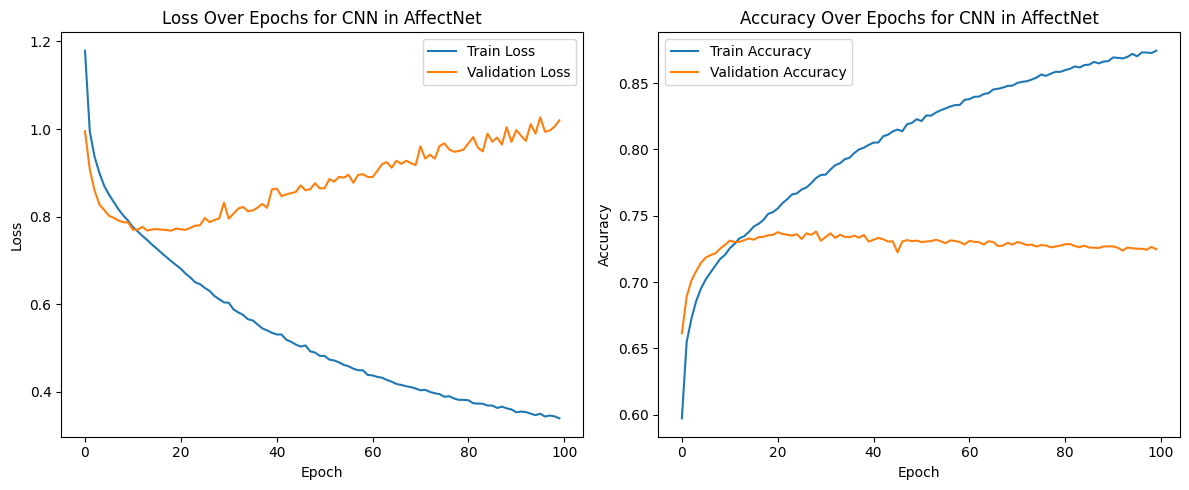

In [ ]:
# -------------------------------
# Train the Model (Using Validation Set) and Plot Training History
# -------------------------------
'''history = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks_list,
    shuffle=True,
    validation_data=(X_val, y_val)
)'''
import matplotlib
# Plot Training History: Loss and Accuracy
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Implement Loss Over Epochs for CNN in AffectNet')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Implement Accuracy Over Epochs for CNN in AffectNet')
plt.legend()

plt.tight_layout()
plt.savefig('/content/drive/My Drive/ec523 project/figure_result/CNN_Implement_Affectnet_loss_and_accuracy_plot.png')
plt.show()
plt.close()

In [ ]:
# Evaluate the Model on Test Set and Plot Confusion Matrix
# -------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print("CNN Implement Test loss:", test_loss, "CNN Implement Test accuracy:", test_acc)
# Evaluate the Model on Test Set and Plot Confusion Matrix
# -------------------------------
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=1)
print("Val Implement loss:", test_loss, "Val Implement accuracy:", test_acc)


1349/1349 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7189 - loss: 1.0327
Test loss: 1.021727442741394 Test accuracy: 0.7228839993476868
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7251 - loss: 1.0191
Val loss: 1.021727442741394 Val accuracy: 0.7228839993476868


1349/1349 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


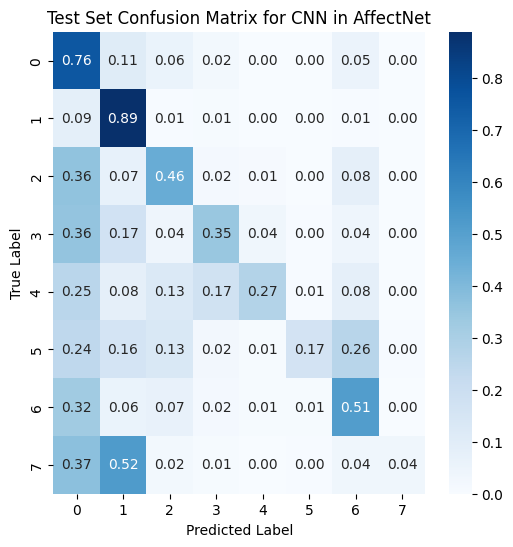

In [ ]:
# -------------------------------
# Evaluate the Model on Test Set and Plot Confusion Matrix
# -------------------------------
#test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
#print("Test loss:", test_loss, "Test accuracy:", test_acc)

# Generate Predictions for Confusion Matrix
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_true, y_test_pred_classes, normalize='true')
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues')
plt.title("CNN Implement Test Set Confusion Matrix for CNN in AffectNet")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig('/content/drive/My Drive/ec523 project/figure_result/CNN_Implementation_Affectnet_confusion_matrix.png')
plt.show()
plt.close()

In [ ]:
# -------------------------------
# Save the Final Model
# -------------------------------
model.save("CNN_AffectNet_final_implement_model.h5")
print("Model saved as CNN_AffectNet_final_implement_model.h5")

Model saved as AffectNet_final_model.h5


In [ ]:
# hypertuning

In [ ]:
# grid search

In [ ]:
from sklearn.model_selection import ParameterGrid
param_grid = {
    'learning_rate': [5e-2, 1e-2, 1e-3],
    'batch_size': [64, 128, 256]
}
grid = list(ParameterGrid(param_grid))
def build_model(learning_rate):
    model = Sequential([
        Input(shape=(48, 48, 1)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same', name="conv1"),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.2),

        Conv2D(32, (3, 3), activation='relu', padding='same', name="conv2"),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), name="maxpool2"),
        Dropout(0.2),

        Conv2D(64, (3, 3), activation='relu', padding='same', name="conv3"),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), name="maxpool3"),
        Dropout(0.2),

        Conv2D(64, (3, 3), activation='relu', padding='same', name="conv4"),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), name="maxpool4"),
        Dropout(0.2),

        Conv2D(128, (3, 3), activation='relu', padding='same', name="conv5"),
        BatchNormalization(),
        Dropout(0.3),

        Flatten(),
        Dense(1024, activation='relu', name='fc1'),
        Dropout(0.3),
        BatchNormalization(),

        Dense(NUM_CLASSES, activation='softmax', name='fcsoftmax')
    ])

    optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
results = []

for params in grid:
    print(f"Training with params: {params}")

    model = build_model(params['learning_rate'])

    history = model.fit(
        X_train, y_train,
        batch_size=params['batch_size'],
        validation_data=(X_val, y_val),
        epochs=10,
        verbose=0
    )

    val_acc = history.history['val_accuracy'][-1]
    results.append({
        'params': params,
        'val_accuracy': val_acc
    })

Training with params: {'batch_size': 64, 'learning_rate': 0.05}
Training with params: {'batch_size': 64, 'learning_rate': 0.01}
Training with params: {'batch_size': 64, 'learning_rate': 0.001}
Training with params: {'batch_size': 128, 'learning_rate': 0.05}
Training with params: {'batch_size': 128, 'learning_rate': 0.01}
Training with params: {'batch_size': 128, 'learning_rate': 0.001}
Training with params: {'batch_size': 256, 'learning_rate': 0.05}
Training with params: {'batch_size': 256, 'learning_rate': 0.01}
Training with params: {'batch_size': 256, 'learning_rate': 0.001}


In [ ]:
best_result = max(results, key=lambda x: x['val_accuracy'])
print("✅ Best Params:", best_result['params'])
print("✅ Best Val Accuracy:", best_result['val_accuracy'])

✅ Best Params: {'batch_size': 256, 'learning_rate': 0.01}
✅ Best Val Accuracy: 0.7023056149482727
